In [2]:
!pip install numpy==1.25.2
!pip install scipy==1.13.0
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.9 MB/s eta 0:00:00


In [3]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [4]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [5]:

#find the most similar words to a word of your choice.
print(model.most_similar('cloud'))
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

[('clouds', 0.7674151659011841), ('ash', 0.712124228477478), ('dust', 0.6641156077384949), ('sky', 0.6198914647102356), ('mist', 0.61464524269104), ('fog', 0.6023924350738525), ('shadow', 0.5859904885292053), ('smoke', 0.5859541893005371), ('swirling', 0.5852329134941101), ('shadows', 0.58254075050354)]


The results does make sense. As they all could be cloud related nouns.

In [6]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [7]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [8]:
#try to isolate a specific dimension in the embeddings and add it to multiple words.
gender=model["woman"]-model["man"]
print(model.most_similar(model["king"]+gender))
print(model.most_similar(model["math"]+gender))
print(model.most_similar(model["work"]+gender))

#does this show any bias or assumptions in the data?
# Discuss with your group and share most interesting dimension in the document

[('king', 0.8551837205886841), ('queen', 0.783441424369812), ('monarch', 0.6933801770210266), ('throne', 0.6833109855651855), ('daughter', 0.6809081435203552), ('prince', 0.6713141798973083), ('princess', 0.6644083261489868), ('mother', 0.6579325199127197), ('elizabeth', 0.6563301086425781), ('father', 0.6392418742179871)]
[('math', 0.878341794013977), ('graders', 0.6566359400749207), ('kindergarten', 0.6406781077384949), ('classroom', 0.6336359977722168), ('literacy', 0.6330397129058838), ('exams', 0.6229733824729919), ('mathematics', 0.6158987879753113), ('teacher', 0.6150739789009094), ('grades', 0.6141564846038818), ('maths', 0.6021277904510498)]
[('work', 0.8444216251373291), ('working', 0.770778238773346), ('she', 0.7144152522087097), ('works', 0.7027965188026428), ('worked', 0.69882732629776), ('her', 0.6794973611831665), ('study', 0.6774320602416992), ('children', 0.6636658906936646), ('well', 0.6577903032302856), ('care', 0.6517068147659302)]


Part 2: Visualization and Embeddings in Space

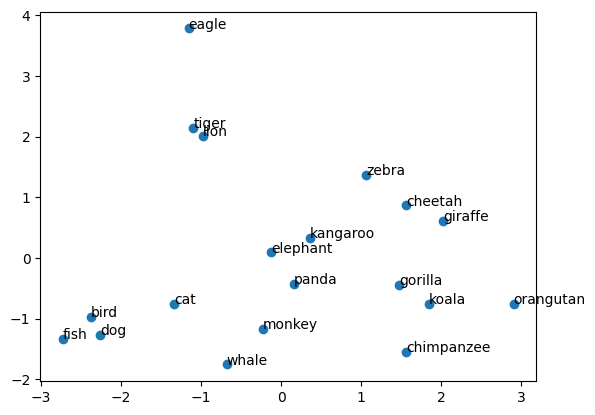

In [9]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

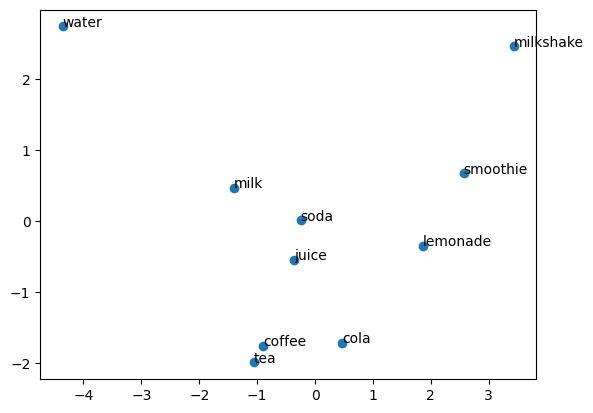

In [10]:
#repeat this process with your own set of 10-20 words.
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words = [
    "water", "coffee", "tea", "milk",
    "juice", "lemonade", "soda", "cola",
    "smoothie", "milkshake"
]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()



In [11]:
# repeat the process with a different pre-trained model and the same set of words.
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


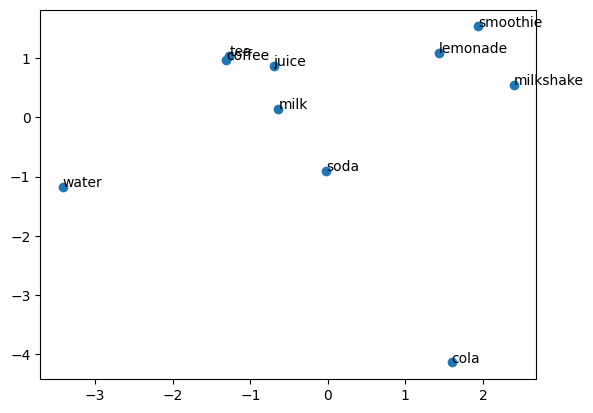

In [12]:
words = [
    "water", "coffee", "tea", "milk",
    "juice", "lemonade", "soda", "cola",
    "smoothie", "milkshake"
]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

The relationship between related words are different when tested with the different models. This is likely infleunced by the context in which these words were used in dataset t was trained on, creating different associations between ddistinct words.

Part 3: Embedding reddit posts

In [13]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("https://raw.githubusercontent.com/lucianli123/project3-embeddings/refs/heads/main/uiuc.csv")
mich=pd.read_csv("https://raw.githubusercontent.com/lucianli123/project3-embeddings/refs/heads/main/umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data


,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
4520,4520,2024-08-10 00:28:57,84,Make it better by figuring out a way in which ...,JustN65,1,0
6420,6420,2024-07-19 04:45:10,127,Finaid is so messed up. I have a -1500 EFC and...,miyoko-my-man,6,0
1009,1009,2024-08-30 05:05:54,6,"No matter the organization, there's no way of ...",bobi2393,4,0
7395,7395,2024-07-12 17:42:05,22,Selling student Texas ticket for less than 200...,Prior_Situation3939,1,0


In [14]:
#using the code from project 1, clean the text and create a bag of words representation of the text
!pip3 install spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text
data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
bag_of_words

<9450x16280 sparse matrix of type '<class 'numpy.int64'>'
	with 228429 stored elements in Compressed Sparse Row format>

ValueError: 'c' argument has 9450 elements, which is inconsistent with 'x' and 'y' with size 18910.

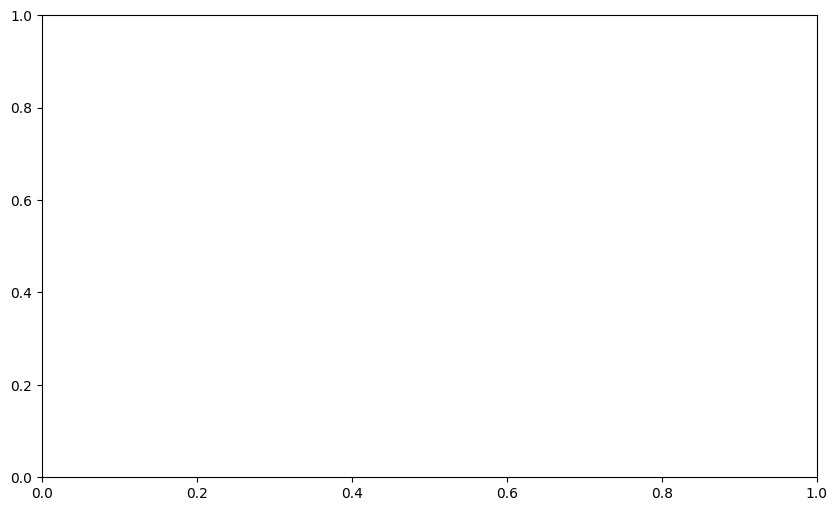

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

cleaned_texts = data['cleaned_text'].tolist()

X = [ ]
for text in cleaned_texts:
    embeddings = [model[word] for word in text.split() if word in model]
    if embeddings:
        X.append(np.mean(embeddings, axis=0))
    else:
        X.append(np.zeros(model.vector_size))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=data['label'].iloc[:len(X_pca)])

for i, word in enumerate(cleaned_texts[:10]):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Word Embeddings")
plt.show()

In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns?

There are no clear separations between the two columns.

In [ ]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:
cleaned_texts = data['cleaned_text'].tolist()
X = []  # Initialize X before the loop

for text in cleaned_texts:
    embeddings = [avg_embedding(word, model) for word in text.split() if word in model]
    if embeddings:
        X.append(np.mean(embeddings, axis=0))
    else:
        X.append(np.zeros(model.vector_size))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))

# Use the correct length for color data
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=data['label'].values[:len(X_pca)])

for i, word in enumerate(cleaned_texts[:10]):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Word Embeddings")
plt.show()

The plot does not seem to be very differerent from the prrevious one. Still no clear separation.

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation?

Part 4: HuggingFace and BERT

In [ ]:
!pip install transformers

In [ ]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


In [ ]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("The weather is nice")

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
sentiments = [pipe(post)[0]['label'] for post in data['text']]

# Count occurrences of each sentiment
sentiment_counts = Counter(sentiments)

# Get the most common sentiment
most_common_sentiment = sentiment_counts.most_common(1)[0]mon(1)[0]

In [ ]:
#look at ten sample posts and labels; do you agree with all of them?

No I do not necessarily agree with all of them.

In [ ]:
#is the UIUC or Michigan subreddit more negative?

The Michigan subreddit is more negative.